# Data visualization


### CCS1 - Week 5

## Preparation
Import some modules, load an example dataset.


In [4]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
! pip install seaborn

### The Titanic dataset

This is a dataset that comes with seaborn and contains statistics on passengers that were embarked on the Titanic. It's just a pandas dataframe, so of course, you could also load your own dataset.

It's always a good idea to use
- `.head()`
- `.shape` (not a method, just a property (=variable), therefore no need to call with `()`
- `.describe()`
- `.value_counts()`

to get a first overview, so let's do that

In [5]:
titanic = sns.load_dataset("titanic")


In [6]:
# Explore dataset

titanic.shape

(891, 15)

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Plotting: Seaborn basics

Seaborn uses the same "grammar" for all different types of plots.
You may find this, hopefully, intuitive, as you basically provide each seaborn function with a couple of arguments, namely
```
data : the name of the dataframe with all your data
x    : which column to plot on the x axis
y    : which column to plot on the y axis
hue  : which column to use to group the data (and represent by different colors)
col  : which column to use to group the data into different sub-plots ('columns')
style: which column to use to group the data into different styles of the marker
size : which column to use to change the size of the marker
... 
```



In other words, when using seaborn, we do not use the method of a pandas object (as with matplotlib, see above), but call the seaborn function directly and pass on the dataframe with the `data = ...` argument

# A systematic look at different visualizations

## 1. Bar charts

- counts per (discrete) category  (in seaborn: `.countplot()`)
- or: other statistical property (e..g, mean)  per (discrete) category (in seaborn: `barplot()`)
- different variations (e.g., stacked bar charts)



<AxesSubplot:xlabel='sex', ylabel='count'>

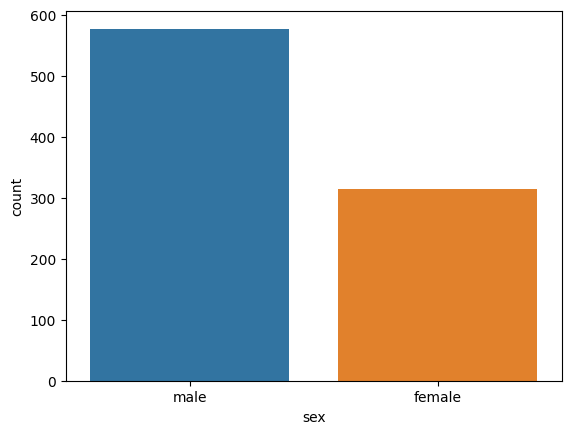

In [11]:
# Look how sns has a function that integrates counting of values and producing the bar chart.
sns.countplot(x = 'sex', data=titanic)

In the following example, we do not want to calculate counts and then plot them in a bar chart, but rather plot the (implicitly calculated) means:

<AxesSubplot:xlabel='class', ylabel='fare'>

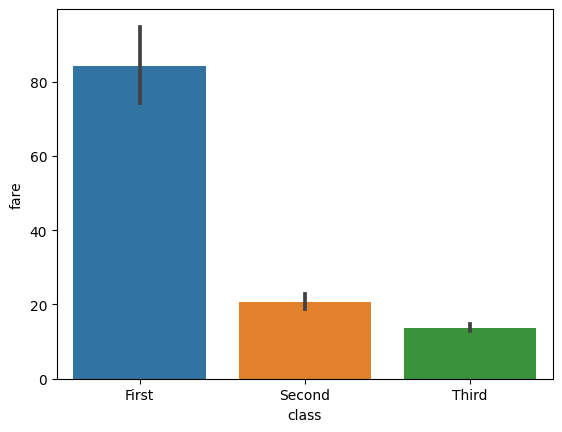

In [14]:
sns.barplot(x="class", y="fare", data=titanic, ci=95)

As always, use the ? to get more help:

In [15]:
sns.barplot?

Signature:
sns.barplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x7f9e38b8d310>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or more catego

### 1.1 Grouped barplots

We can use the `hue` argument to say that we want to use different colors for different groups:

<AxesSubplot:xlabel='class', ylabel='fare'>

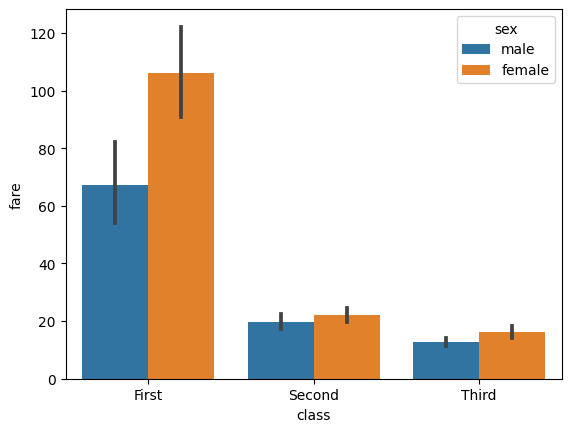

In [16]:
sns.barplot(x="class", y="fare",  hue="sex",  data=titanic)

`catplot` provides a more generic interface, where we can also specify a different `kind` than bar if we want to (such as `point` instead of `bar`, see next section):

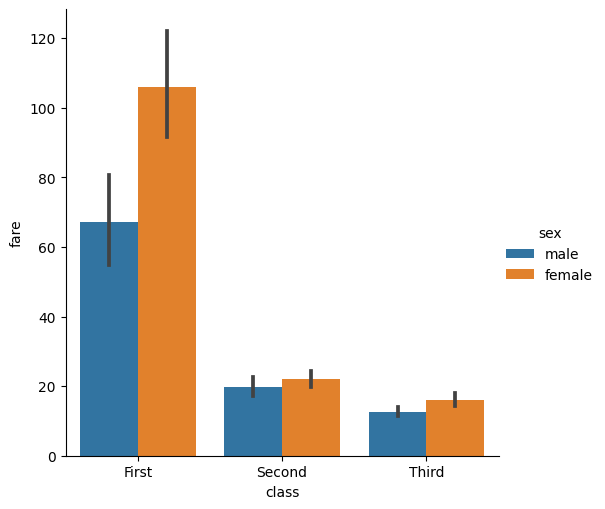

In [17]:
sns.catplot(x="class", y="fare", hue="sex", kind='bar', data=titanic)

In [ ]:
sns.barplot?

### 1.2 Histograms


Histograms could be seen as somewhat related to bar plots, but they are used to display the univariate distribution of numerical variables. If there are many, then they are 'binned'. Some examples:

<AxesSubplot:xlabel='fare', ylabel='Count'>

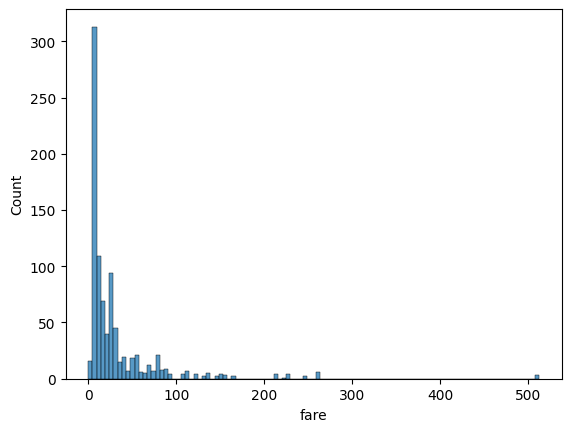

In [18]:
sns.histplot(x = 'fare', data=titanic)

In [19]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mass

<AxesSubplot:xlabel='fare', ylabel='Count'>

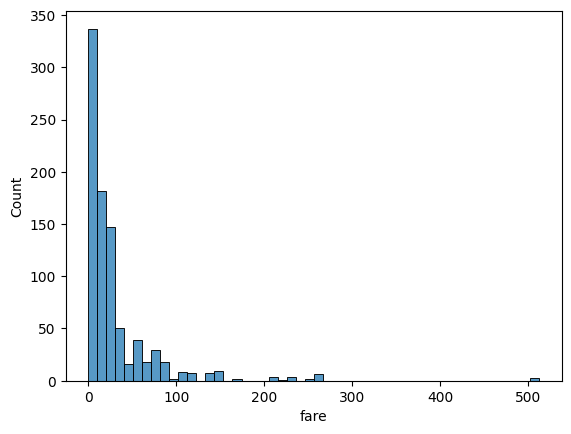

In [21]:
sns.histplot(x = 'fare', bins=50, data=titanic)

# 2. Point charts

- similar to bar charts
- but: can look 'cleaner'
- but: can give a clearer message if the categories can be meaningfully ordered

Compare the following two charts that present the same data:



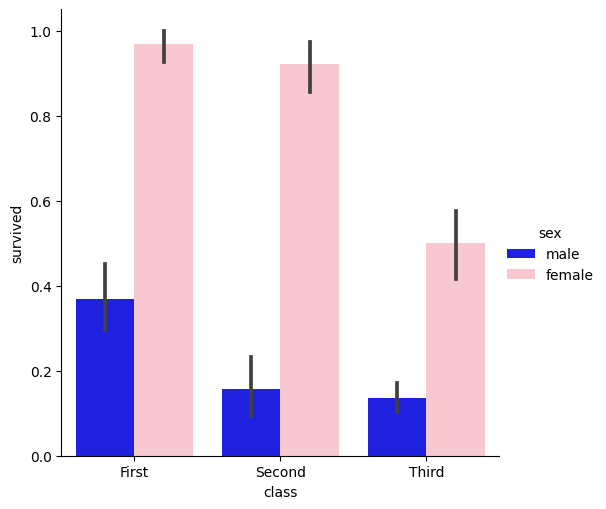

In [28]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "b", "female": "pink"},
            kind="bar", data=titanic)

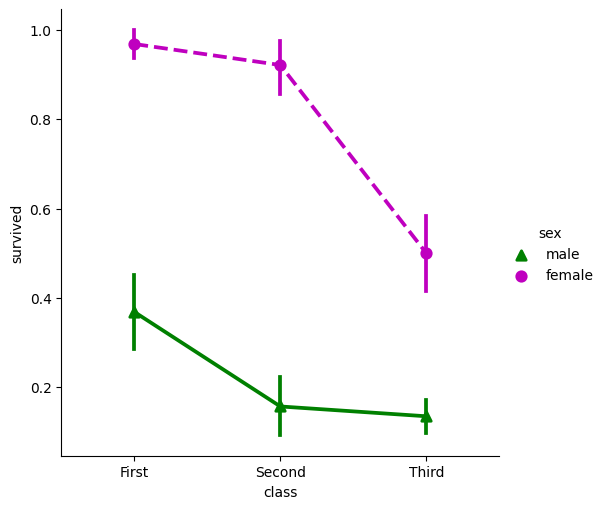

In [23]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

## 3. Line charts

- ordered (and typically evenly spaced) values on x-axis
- x-axis has many (in theory: contious) measurements
- most typical: plot some value(s) over time


In [29]:
# never mind about this specific code, we just want a dataset that looks like a time series
# this is some economic indicator per year per country that's it
capital= pd.read_csv("https://cssbook.net/d/private_capital.csv").melt(id_vars="Year",
            var_name="country", value_name="capital").rename({"Year":"year"}, axis=1)
capital.head()

,year,country,capital
0,1970,U.S.,3.42
1,1971,U.S.,3.41
2,1972,U.S.,3.49
3,1973,U.S.,3.39
4,1974,U.S.,3.21


<AxesSubplot:xlabel='year', ylabel='capital'>

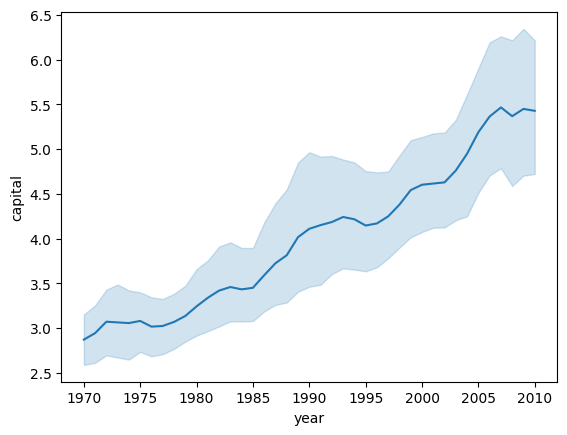

In [30]:
# if we have multiple measurements (=countries) for a year, we get a confidence interval
sns.lineplot(x='year', y='capital', data=capital)

In [ ]:
# there's never more than one measurement per year and country, so no confindence interval
sns.lineplot(x='year', y='capital', hue='country', data=capital)

# 4. Plotting bivariate relationships

If we have bivariate relationships between **continous variables**, we usually plot them using a **scatter plot**. Scatter plots show a little dot for each data point.

In seaborn, we can create them using either `.relplot()` for a simple scatter plot, or `.regplot()` if we want to have a scatter plot with an added regression line.

In [31]:
# let's use a different dataset for this, where we have two continuous variables (total_bill and tip)

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


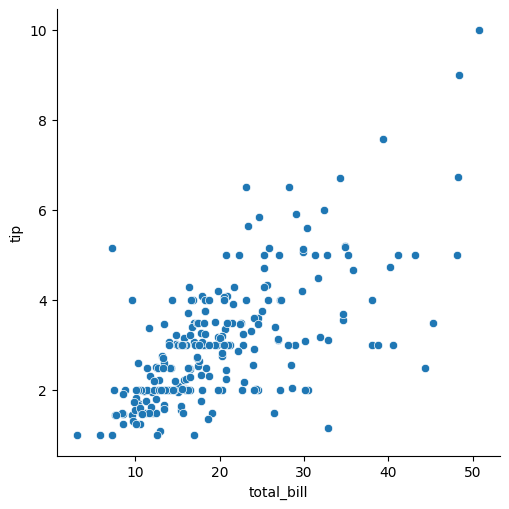

In [32]:
# the same with seaborn
sns.relplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

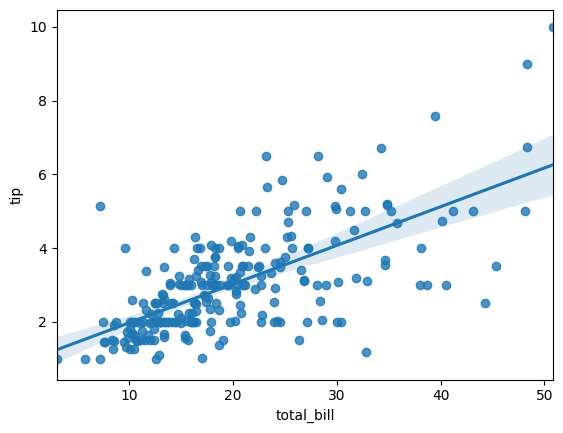

In [33]:
# but seaborn can do more, e.g. add a regression line and confidence intervals
sns.regplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

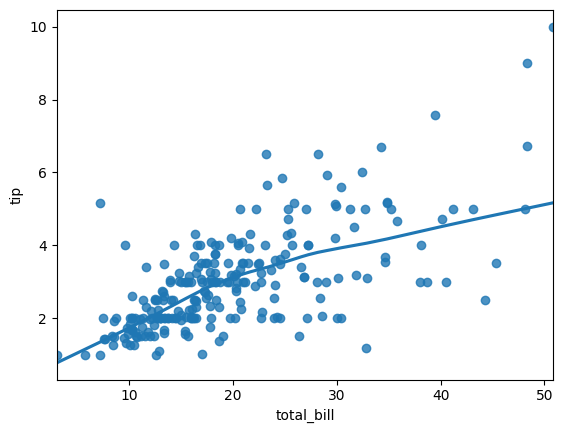

In [34]:
# Or we can draw a locally weighted regression line (lowess)
# (and much more)
sns.regplot(x='total_bill', y='tip', data=tips, lowess=True)

In [ ]:
! pip install statsmodels

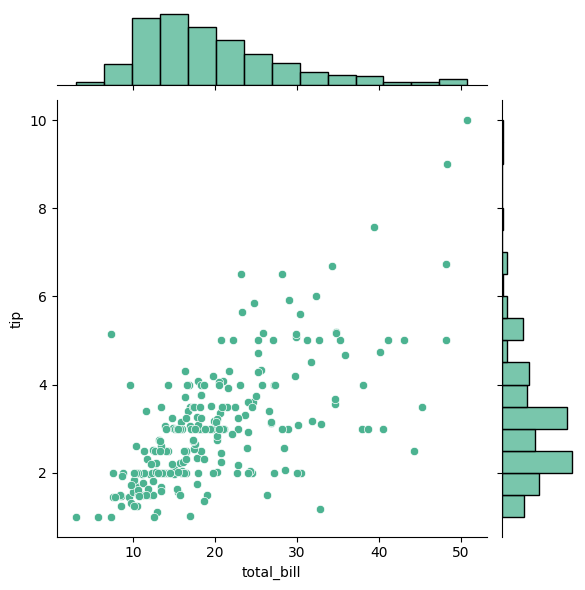

In [35]:
# We could also add histograms to the sides
sns.jointplot(data = tips, x = 'total_bill', y='tip', 
              kind="scatter", color="#4CB391")

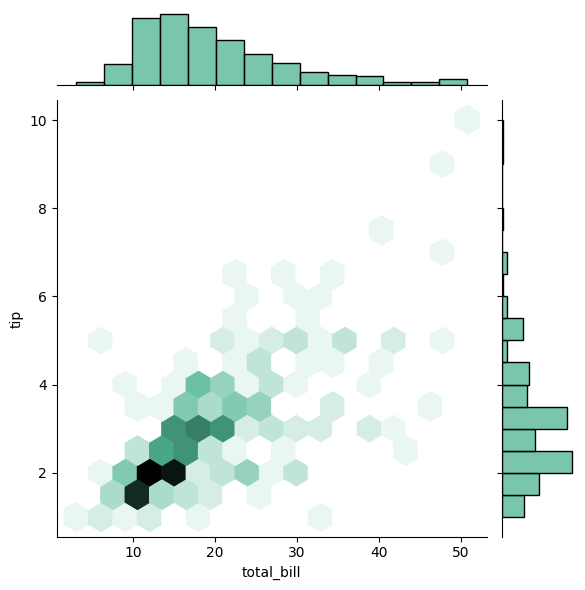

In [36]:
# ... or replace the scatterplot by a hexplot in which overlapping points lead to a darker shade
sns.jointplot(data = tips, x = 'total_bill', y='tip', 
              kind="hex", color="#4CB391")

# Bonus 

We do not cover this in this class, but you can also create interactive plots in Python:

In [ ]:
pd.options.plotting.backend = "plotly"
fig = tips.plot(x= "total_bill", y='tip', kind='scatter', hover_data={"smoker":True})
fig.show()
fig.write_html("plotly-example.html")

Another, really powerful way to build interactive visualization apps is Bokeh - see the tutorial here: 
https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb